In [2]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
import matplotlib.font_manager as fm

In [3]:
temp = pd.read_csv("mycars.csv", engine="python")

temp2 = temp[['manufacturer','mpg']]
temp2.groupby('manufacturer').describe()

temp3 = temp[['automatic', 'mpg']]
temp3.groupby('automatic').describe()


mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [4]:
temp.describe()

,displacement,year,cylinder,mpg,highway_mileage
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [5]:
temp

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [6]:
df = temp[['model','year','manufacturer']]
df

,model,year,manufacturer
0,a4,1999,audi
1,a4,1999,audi
2,a4,2008,audi
3,a4,2008,audi
4,a4,1999,audi
...,...,...,...
229,passat,2008,volkswagen
230,passat,2008,volkswagen
231,passat,1999,volkswagen
232,passat,1999,volkswagen


In [7]:
df.groupby('model').describe()

year                                                  \
                       count         mean       std     min      25%     50%   
model                                                                          
4runner 4wd              6.0  2002.000000  4.647580  1999.0  1999.00  1999.0   
a4                       7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   
a4 quattro               8.0  2003.500000  4.810702  1999.0  1999.00  2003.5   
a6 quattro               3.0  2005.000000  5.196152  1999.0  2003.50  2008.0   
altima                   6.0  2005.000000  4.647580  1999.0  2001.25  2008.0   
c1500 suburban 2wd       5.0  2006.200000  4.024922  1999.0  2008.00  2008.0   
camry                    7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   
camry solara             7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   
caravan 2wd             11.0  2003.090909  4.700097  1999.0  1999.00  1999.0   
civic                    9.0  2003.000000  4.743416  1999.0  1999.00  1999.0   
corolla                  5.0  2002.600000  4.929503  1999.0  1999.00  1999.0   
corvette                 5.0  2004.400000  4.929503  1999.0  1999.00  2008.0   
dakota pickup 4wd        9.0  2004.000000  4.743416  1999.0  1999.00  2008.0   
durango 4wd              7.0  2004.142857  4.810702  1999.0  1999.00  2008.0   
expedition 2wd           3.0  2002.000000  5.196152  1999.0  1999.00  1999.0   
explorer 4wd             6.0  2002.000000  4.647580  1999.0  1999.00  1999.0   
f150 pickup 4wd          7.0  2001.571429  4.391550  1999.0  1999.00  1999.0   
forester awd             6.0  2005.000000  4.647580  1999.0  2001.25  2008.0   
grand cherokee 4wd       8.0  2005.750000  4.166190  1999.0  2005.75  2008.0   
grand prix               5.0  2002.600000  4.929503  1999.0  1999.00  1999.0   
gti                      5.0  2002.600000  4.929503  1999.0  1999.00  1999.0   
impreza awd              8.0  2003.500000  4.810702  1999.0  1999.00  2003.5   
jetta                    9.0  2003.000000  4.743416  1999.0  1999.00  1999.0   
k1500 tahoe 4wd          4.0  2003.500000  5.196152  1999.0  1999.00  2003.5   
land cruiser wagon 4wd   2.0  2003.500000  6.363961  1999.0  2001.25  2003.5   
malibu                   5.0  2004.400000  4.929503  1999.0  1999.00  2008.0   
maxima                   3.0  2002.000000  5.196152  1999.0  1999.00  1999.0   
mountaineer 4wd          4.0  2003.500000  5.196152  1999.0  1999.00  2003.5   
mustang                  9.0  2004.000000  4.743416  1999.0  1999.00  2008.0   
navigator 2wd            3.0  2002.000000  5.196152  1999.0  1999.00  1999.0   
new beetle               6.0  2002.000000  4.647580  1999.0  1999.00  1999.0   
passat                   7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   
pathfinder 4wd           4.0  2003.500000  5.196152  1999.0  1999.00  2003.5   
ram 1500 pickup 4wd     10.0  2005.300000  4.347413  1999.0  2001.25  2008.0   
range rover              4.0  2003.500000  5.196152  1999.0  1999.00  2003.5   
sonata                   7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   
tiburon                  7.0  2005.428571  4.391550  1999.0  2003.50  2008.0   
toyota tacoma 4wd        7.0  2002.857143  4.810702  1999.0  1999.00  1999.0   

                                         
                            75%     max  
model                                    
4runner 4wd             2005.75  2008.0  
a4                      2008.00  2008.0  
a4 quattro              2008.00  2008.0  
a6 quattro              2008.00  2008.0  
altima                  2008.00  2008.0  
c1500 suburban 2wd      2008.00  2008.0  
camry                   2008.00  2008.0  
camry solara            2008.00  2008.0  
caravan 2wd             2008.00  2008.0  
civic                   2008.00  2008.0  
corolla                 2008.00  2008.0  
corvette                2008.00  2008.0  
dakota pickup 4wd       2008.00  2008.0  
durango 4wd             2008.00  2008.0  
expedition 2wd          2003.

In [8]:
good = pd.read_csv("Exh_QC1.csv", engine="python")
new = good[['Flaws','Period']]
count = new['Flaws'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [9]:
cumpct = np.cumsum(percent)
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [10]:
ex1 = pd.DataFrame({'count':count, 'cumcnt':cumcnt, 'percent':percent, 'cumpct':cumpct})
ex1.columns.name = 'Flaws'
ex1

Flaws,count,cumcnt,percent,cumpct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [11]:
new = good[['Flaws','Period']]

count2 = new['Period'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2 / sum(count2) * 100
percnt2 = np.cumsum(percent2)

ex2 = pd.DataFrame({'count':count2, 'cumcnt':cumcnt2, 'percent':percent2, 'percnt':percnt2})
ex2.columns.name = 'Period'
ex2

Period,count,cumcnt,percent,percnt
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


In [12]:
print(count3)

NameError: name 'count3' is not defined

In [13]:
temp = pd.read_csv("mycars.csv", engine='python')
temp2 = temp[['model','mpg']]

count = temp2['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count)
pumcnt = np.cumsum(percent)

ex3 = pd.DataFrame({'count':count, 'cumcnt':cumcnt,'percent':percent,'pumcnt':pumcnt})
ex3.columns.name = 'model'
ex3

count2 = temp2['mpg'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2 / sum(count2)
pumcnt2 = np.cumsum(percent2)

ex3 = pd.DataFrame({'count':count2, 'cumcnt':cumcnt2,'percent':percent2,'pumcnt':pumcnt2})
ex3.columns.name = 'mpg'
ex3

mpg,count,cumcnt,percent,pumcnt
9,5,5,0.021368,0.021368
11,20,25,0.085470,0.106838
12,8,33,0.034188,0.141026
13,21,54,0.089744,0.230769
14,19,73,0.081197,0.311966
15,24,97,0.102564,0.414530
16,19,116,0.081197,0.495726
17,16,132,0.068376,0.564103
18,26,158,0.111111,0.675214
19,20,178,0.085470,0.760684


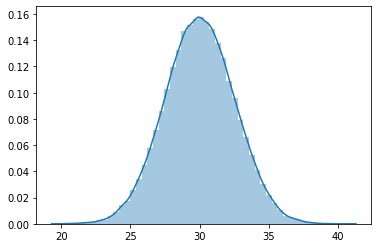

In [18]:
np.random.seed(1234)

normal = np.random.normal(30,2.5,100000)

sns.distplot(normal)

In [17]:
normal

array([20.94287033, 17.61804861, 22.86541394, ..., 20.05857145,
       17.55893843, 20.76822474])

In [21]:
mu = 175
sigma = 5
x = 180

prob = stats.norm.cdf(x,mu,sigma)

print((1-prob)*100)

15.865525393145708
